In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
#Initialising CNN
Model=Sequential()
#1st layer
Model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))

#2nd layer
Model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.25))
#Flattening layer
Model.add(Flatten())
#Full connection layer
Model.add(Dense(units=128,activation='relu'))
Model.add(Dense(units=3,activation='softmax'))
#Compliing the CNN
Model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [3]:
!pip install scikit-image

In [4]:
!pip install matplotlib

**Data Augmentation**

In [5]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os

In [6]:
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def increase_brightness(img, value=30):
    hsv= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(hsv)
    
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [7]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                      'increase brightness': increase_brightness,
                      'sharpening image': unsharp_mask
                 }                #use dictionary to store names of functions 

images_path="C:/Users/Arjun Rao/Desktop/Training/S" #path to original images
augmented_path="C:/Users/Arjun Rao/Desktop/Training/augmented_images_saree" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=200  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1


In [8]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                      'increase brightness': increase_brightness,
                      'sharpening image': unsharp_mask
                 }                #use dictionary to store names of functions 

images_path="C:/Users/Arjun Rao/Desktop/Training/Sh" #path to original images
augmented_path="C:/Users/Arjun Rao/Desktop/Training/augmented_images_shirt" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=200  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1


In [9]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                      'increase brightness': increase_brightness,
                      'sharpening image': unsharp_mask
                 }                #use dictionary to store names of functions 

images_path="C:/Users/Arjun Rao/Desktop/Training/T" #path to original images
augmented_path="C:/Users/Arjun Rao/Desktop/Training/augmented_images_tshirt" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=200  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None
#     print(i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training=train_gen.flow_from_directory('C:/Users/Arjun Rao/Desktop/Training',
                                       target_size=(64,64),batch_size=20,class_mode='categorical')

test_gen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test=test_gen.flow_from_directory('C:/Users/Arjun Rao/Desktop/Test',
                                  target_size=(64,64),batch_size=5,class_mode='categorical')

Found 900 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [11]:
History=Model.fit_generator(training,steps_per_epoch=150,epochs=8,validation_data=test,validation_steps=50)

Epoch 1/8
150/150 [==============================] - 256s 2s/step - loss: 0.8695 - accuracy: 0.6197 - val_loss: 0.4199 - val_accuracy: 0.7640
Epoch 2/8
150/150 [==============================] - 208s 1s/step - loss: 0.4605 - accuracy: 0.8033 - val_loss: 0.2930 - val_accuracy: 0.8600
Epoch 3/8
150/150 [==============================] - 206s 1s/step - loss: 0.3057 - accuracy: 0.8773 - val_loss: 0.1373 - val_accuracy: 0.7920
Epoch 4/8
150/150 [==============================] - 203s 1s/step - loss: 0.2487 - accuracy: 0.9007 - val_loss: 0.3633 - val_accuracy: 0.8480
Epoch 5/8
150/150 [==============================] - 203s 1s/step - loss: 0.1953 - accuracy: 0.9250 - val_loss: 0.0019 - val_accuracy: 0.8560
Epoch 6/8
150/150 [==============================] - 213s 1s/step - loss: 0.1538 - accuracy: 0.9437 - val_loss: 0.4849 - val_accuracy: 0.8240
Epoch 7/8
150/150 [==============================] - 209s 1s/step - loss: 0.1118 - accuracy: 0.9587 - val_loss: 0.0310 - val_accuracy: 0.8560
Epoch 

**Loss plot**

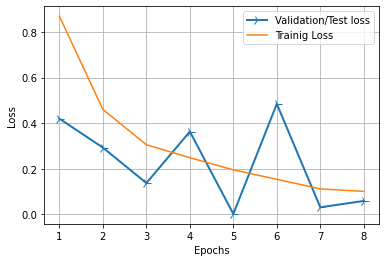

In [12]:
import matplotlib.pyplot as plt

history_dict=History.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values, label='Validation/Test loss')
line2=plt.plot(epochs,loss_values,label='Trainig Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line1,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

**Accuracy plot**

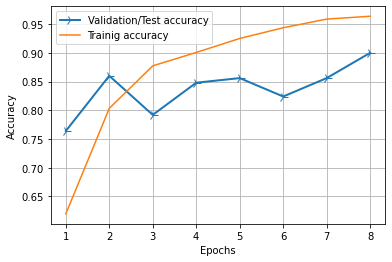

In [13]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values, label='Validation/Test accuracy')
line2=plt.plot(epochs,acc_values,label='Trainig accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line1,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

**Predictions**

In [15]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('C:/Users/Arjun Rao/Desktop/sa.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)
result=Model.predict(test_image)
training.class_indices
if result[0][0]==1:
    prediction="Saree"
elif result[0][1]==1:
    prediction="Shirt"
else:
    prediction="T-shirt"
print(prediction)   

Saree
